Support Vector Machines (SVM)
------

<center><img src="images/support_svm.png" width="600"/></center>

Quick Review
-----

- Supervised Classifers
- Train/Test split
- Bias-Variance trade-offs
- Regularizaiton
- Evaluation metrics

Using Support Vector Machines (SVM) to solve roommate issues
------
<center><img src="images/roommate.jpg" width="700"/></center>

When I was a student in SF, I had to share a room with a roommate. 

It was huge room and our stuff was all over the floor. We too lazy to pick the stuff up. But we wanted privacy.

Our solution was to separate our stuff but all we had was a straight room divider.

We could the divider anywhere, we decided it was most fair to put in the middle of our stuff.

<center><img src="images/panel_divider.jpg" width="700"/></center>

By The End Of This Session You Should Be Able To:
----

- Explain Support Vector Machines (SVM) in your own words
- Explain the notion of decision boundaries
- Find the support vectors for a SVM
- Fit and interpert a SVM to data
- Explain the Kernel Trick in your own words

Define SVM
-----

Case Study: What is in the box?
-------

<center><img src="images/Mystery_Box.jpg" width="700"/></center>

In [96]:
reset -fs

In [97]:
X = [[8, 12], 
     [20, 25]]
 
y = ['orange', 'basketball']

Visually inspect the data
------

In [98]:
import pandas as pd
import seaborn as sns

%matplotlib inline

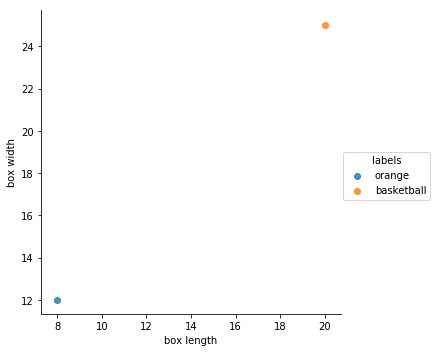

In [99]:
# Munge data into Pandas dataframe for easier ploting
df = pd.DataFrame(X, columns=['box length', 'box width'])
df['labels'] = ['orange', 'basketball']

# Plot 
item_plot = sns.lmplot(data=df,
                      x='box length', 
                      y='box width',
                      fit_reg=False,        # Do not fit a regression line to the data
                      hue="labels",         #'hue' will color code each group
                      legend=True);

Fit SVM
-----

In [101]:
from sklearn import svm

In [102]:
# Define an instance of a SVM classifer
clf = svm.SVC()

In [103]:
# Estimate the classifer for our data
clf.fit(X, y);  

After being fitted, the model can then be used to predict new values:

'orange'

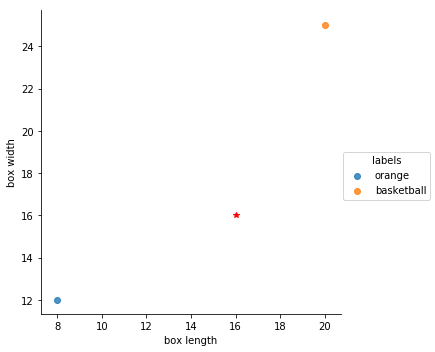

In [106]:
# value = [2, 2]
# value = [30, 30]
# value = [16, 16]

# Plot 
item_plot = sns.lmplot(data=df, x='box length', y='box width', fit_reg=False, hue="labels", legend=True);
item_plot.ax.plot(value[0], value[1], color='red', marker='*');

# Predict
# clf.predict([value]).item()

Check for understanding
-------

What are the support vectors in this example?

In [75]:
# Get support vectors
clf.support_vectors_

array([[20., 25.],
       [ 8., 12.]])

# Plot svm

In [76]:
clf.intercept_

array([-0.])

Reference: http://scikit-learn.org/stable/modules/svm.html

Case Study: Everyone's favorite… The Iris Dataset
------

<center><img src="images/iris.jpg" width="700"/></center>

In [77]:
from sklearn import datasets

iris = datasets.load_iris()

In [78]:
# Use only the first two features for plotting
X = iris.data[:, :2]
y = iris.target

In [79]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [80]:
# Define & fit model
clf = svm.SVC().fit(X, y)
predicted = clf.predict(iris.data[:, :2])

In [81]:
from sklearn.metrics import confusion_matrix
from pprint_cm import pprint_cm

pprint_cm(cm=confusion_matrix(predicted, iris.target), 
         labels=iris.target_names)

                   setosa versicolor  virginica 
        setosa       50.0        0.0        0.0 
    versicolor        0.0       38.0       14.0 
     virginica        0.0       12.0       36.0 


Check for understanding
------

How well does our model do?

Where does it make mistakes?

Check for understanding
-------

What are the support vectors in this example?

In [82]:
# Get support vectors
# clf.support_vectors_

In [83]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Plot SVM
-----

In [90]:
# Data manipulation
import pandas as pd

# Plotting
import seaborn as sns

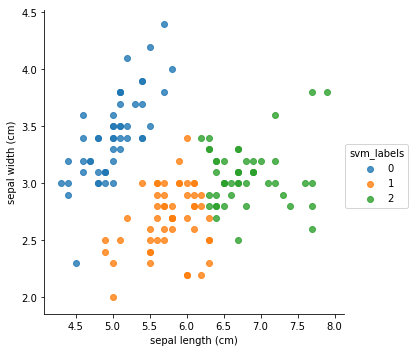

In [91]:
# Add the cluster labels for each data point to the dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['svm_labels'] = predicted

# Plot 
svm_plot = sns.lmplot(data=df,
                      x='sepal length (cm)', 
                      y='sepal width (cm)',
                      fit_reg=False,        # Do not fit a regression line to the data
                      hue="svm_labels",     #'hue' will color code each group
                      legend=True);

In [88]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),svm_labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
import numpy as np

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)

Kernel Trick: The one weird thing that makes linear classifiers fit better
-----

Remember earlier our number line with examples on it…


<center><img src="images/kernel.png" width="700"/></center>

What is a Kernel?
------

A Kernel maps lower dimesnional data into higher demsions.

Hopefully, the data is then linearly seperable in higher dimensions.

Kernels are often nonlinear!

Question for Thought
-----

What are the disadvanateges of a kernel?

- Picking the "right" kernel can be hard
- Since kernels are nonlinear and higher dimensional scaling, there can be high computational cost.

When should you use SVMs?
-----

use small about the data
    + can handle class imbalances
    + can be extended for anonlymy dectetion
    + fast for prediction

When should you NOT use SVMs?
-----

- Slow to train
- sensetive to regularization and kernel choices

Check for understanding
------

I want to build XX....

Summary
------

- Support Vector Machines (SVM) are 

Further Study
-----

<center><img src="images/mug.png" width="300"/></center>
- Dig into the math of SVM. [The Elements of Statistical Learning](http://www.springer.com/us/book/9780387848570)
- Implement your own SVM classifer. [Example](http://tullo.ch/articles/svm-py/)
- Explore kernels. [Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond](https://www.amazon.com/Learning-Kernels-Regularization-Optimization-Computation/dp/0262194759)
- Hard vs. Soft margin

<br>
<br> 
<br>

----